<h1><center><center><h1><h1><center><span style="color:#2189b5">Linear Regression with Multiple Variables</span><center><h1>

## In this notebook, we will implement linear regression with multiple variables to predict the prices of houses, using scikit-learn.

### Introduction :
Suppose you are selling your house and want to know what would be a good price to list it at. You have a dataset of houses with features such as the size of the house, the number of bedrooms, and the age of the house, along with their corresponding prices.

You would like to use this data to build a linear regression model that can predict the price of a house based on its features.

### This notebook contains :
The dataset for our linear regression problem. The first column is the size of the house in square feet, the second column is the number of bedrooms, and the third column is the House Age, forth column is the Price of the house.

### Task : 
Build a linear regression model to predict the price of a house based on its size and number of bedrooms, using scikit-learn.

1.Perform exploratory data analysis (EDA) to understand the dataset.<br>
2.Use scikit-learn's LinearRegression model to fit the data and learn the parameters.<br>
3.Use the trained model to predict the price of a house with 1650 square feet and 3 bedrooms.

# Libraries you will need :


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## An Autograde Script just run the code :
### you don't need to look at it :)

In [2]:
from colorama import Fore

class GradeTask:
    
    @staticmethod
    def grade_task1(x,y):
        try:
            assert x.shape == (20,3)
        except AssertionError:
            print(Fore.RED, "Make sure that x is stored in a dataframe with shape of (20,3)")
        try:
            assert y.shape == (20,) or y.shape == (20,1)
        except AssertionError:
            print(Fore.RED, "Make sure that shape of y is (20,) or (20,1)")
        try:
            assert x.columns[0] == 'Size'
            assert x.columns[1] == 'Bedrooms'
            assert x.columns[2] == 'House Age'
        except AssertionError:
            print(Fore.RED, "columns name is right or they are with the same specified order")
            
        print(Fore.GREEN, "All assertions passed. The output is correct.")
    
    @staticmethod
    def grade_task2(coef, intercept):
        try:
            assert coef.shape == (3,)
            assert intercept.shape == ()
        except AssertionError:
            print(Fore.RED, "There is a problem with the output (shape of coef_ should be (3,) and intercept_ should be ())")
            return
        
        try:
            coefs_ = []
            for i in coef:
                coefs_.append(i)
            coefs_[0] - 142.3175664382422 < 0.1
            coefs_[1] - 15663.563429717538 < 0.1
            coefs_[2] - -2428.229984957383 < 0.1
        except AssertionError:
            print(Fore.RED, "One or more of the output weights is not correct")
            print(Fore.RED, "coef : should be near 142.3175664382422, 15663.563429717538 -2428.229984957383")
            return
        
        print(Fore.GREEN, "All assertions passed. The output is correct.")
     
    @staticmethod
    def grade_task3(predicted):
        try:
            assert predicted - 295726.29115828 < 0.01
        except AssertionError:
            print(Fore.RED, "looks like the prediction is not correct it should be near to 295726.29115828")
            return
        
        print(Fore.GREEN, "All assertions passed. The output is correct.")

# The Dataset :
### Just run this code for the datasets...

In [3]:
house_sizes = [1500, 2000, 1600, 1200, 1800, 2200, 1300, 1900, 2100, 1700, 1400, 2000, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500]
bedrooms = [3, 4, 3, 2, 3, 4, 2, 4, 4, 3, 2, 4, 2, 2, 3, 3, 4, 4, 4, 5]
ages = [10, 5, 8, 15, 3, 2, 12, 6, 4, 9, 13, 7, 14, 11, 10, 8, 5, 2, 1, 6]
prices = [250000, 350000, 275000, 200000, 320000, 400000, 220000, 380000, 390000, 300000, 240000, 350000, 190000, 230000, 260000, 280000, 360000, 400000, 420000, 450000]

df = pd.DataFrame({'Size': house_sizes, 'Bedrooms': bedrooms, 'House Age': ages, 'Price': prices})
df

,Size,Bedrooms,House Age,Price
0,1500,3,10,250000
1,2000,4,5,350000
2,1600,3,8,275000
3,1200,2,15,200000
4,1800,3,3,320000
5,2200,4,2,400000
6,1300,2,12,220000
7,1900,4,6,380000
8,2100,4,4,390000
9,1700,3,9,300000


<h1><font color='#2189b5'> Perform exploratory data analysis (EDA) to understand the dataset.</font></h1>
<br><br>

#### 1 - First understand how does each feature in the dataset effects the `price` of the house :

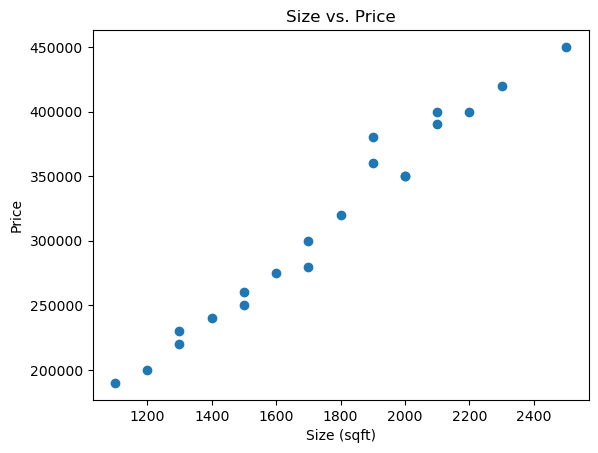

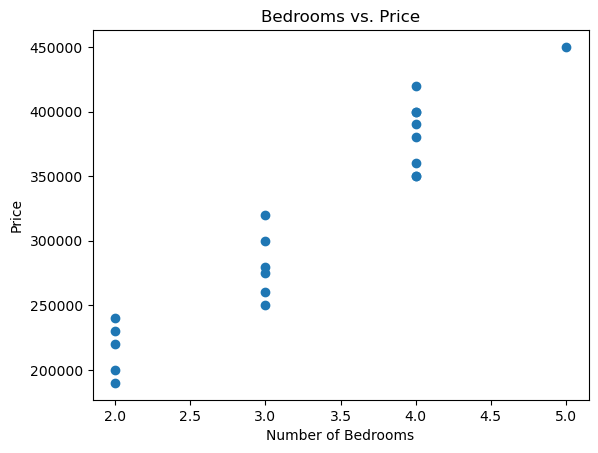

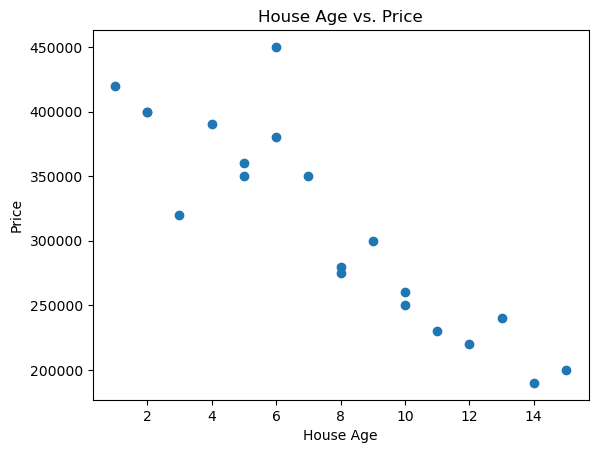

In [4]:
## 1 - Write your code here :
plt.scatter(df['Size'], df['Price'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Size vs. Price')
plt.show()

# Scatter plot for Bedrooms vs. Price
plt.scatter(df['Bedrooms'], df['Price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price')
plt.show()

# Scatter plot for House Age vs. Price
plt.scatter(df['House Age'], df['Price'])
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('House Age vs. Price')
plt.show()

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use Scatter Plots ;)
</details>

<br><br>

#### 2 - Second Visualize the distribution of each of the continous features of the data :

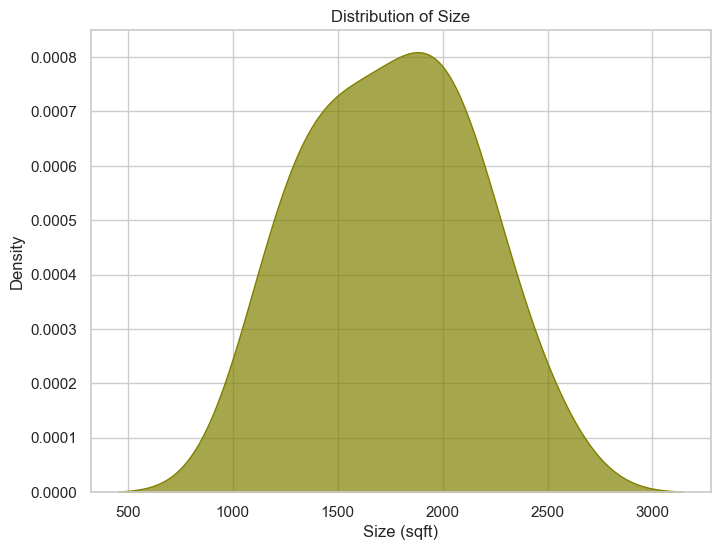

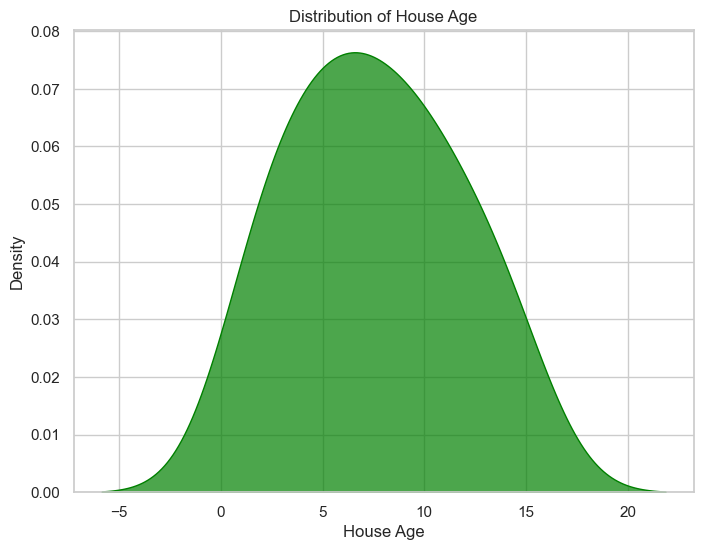

In [5]:
## 2 - Write your code here :


# Set up the plotting style
sns.set(style='whitegrid')

# KDE Plot for Size
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Size', fill=True, color='Olive', alpha=0.7)
plt.xlabel('Size (sqft)')
plt.ylabel('Density')
plt.title('Distribution of Size')
plt.show()

# KDE Plot for House Age
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='House Age', fill=True, color='green', alpha=0.7)
plt.xlabel('House Age')
plt.ylabel('Density')
plt.title('Distribution of House Age')
plt.show()


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use KDE Plots or box plots ;)
</details>

<br><br>

<h1><font color='#2189b5'>Briefly describe the insights you got after visualizing the data :</font></h1>
<br><br>

In [6]:
## 3 - Write what you noticed here :

"""
*The scatter plot of "Size vs. Price" shows that there is a positive relationship
 between the size of the house and its price
    
*The scatter plot of "House Age vs. Price" doesn't show a clear pattern or linear relationship 
between the age of the house and its price. The data points are scattered without any obvious trend.

*The scatter plot of "Bedrooms vs. Price" doesn't exist in this analysis as the number of
bedrooms is a discrete (categorical) variable, not continuous.

"""

'\n*The scatter plot of "Size vs. Price" shows that there is a positive relationship\n between the size of the house and its price\n    \n*The scatter plot of "House Age vs. Price" doesn\'t show a clear pattern or linear relationship \nbetween the age of the house and its price. The data points are scattered without any obvious trend.\n\n*The scatter plot of "Bedrooms vs. Price" doesn\'t exist in this analysis as the number of\nbedrooms is a discrete (categorical) variable, not continuous.\n\n'

<h1><font color='#2189b5'>Look again at the dataframe then...</font></h1><br>
- Store the target variable (price) in a variable y.<br>
- Store the features in variable x.


<h3><font color='blue'>Please don't change the order of the columns, and don't change name of any column</font></h3>
<h5><font color='blue'>order in x : [Size, Bedrooms, House Age]</font></h5><br>

In [7]:
# 4 - Write your code here :

y = df['Price']

x = df[['Size', 'Bedrooms', 'House Age']]


##### Just run this :

In [8]:
GradeTask.grade_task1(x,y)

 All assertions passed. The output is correct.


<h1><font color='#2189b5'>Based on the previous data let's build our Machine Learning model...</font></h1>
<br><br>

#### import linear regression from sklearn

In [9]:
# 6 - Write your code here :
from sklearn.linear_model import LinearRegression

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    from sklearn.linear_model import LinearRegression
</details>

<br><br>

#### Ok remember that we imported LinearRegression from sklearn, now We want to create object from this class....<br><br>Make object from LinearRegression class and name it as `lr`

In [10]:
# 7 - Write your code here :
lr = LinearRegression()

#### Fit your linear regression model on the training data that you have, which is x and y...

In [11]:
# 8 - Write your code here :
lr.fit(x,y)

LinearRegression()

#### Let's have a look on the parameters of the model that you trained :)

In [16]:
# 9 - Write your code here :
coefficients = lr.coef_
intercept = lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [  142.31756644 15663.56342972 -2428.22998496]
Intercept: 30909.226140731247


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    to get weights use : lr.coef_ <br><br>
    to get bias use : lr.intercept_
</details>

<br><br>

##### just run this :

In [17]:
GradeTask.grade_task2(lr.coef_,lr.intercept_)

 All assertions passed. The output is correct.



<h1><font color='#2189b5'>Now your model is trained and it is now ready for making new predictions</font></h1>
<h3><font color='blue'>Note that to make new predictions you should make same scaling and preprocessing on the new test data also...</font></h3>
<br><br>

#### Use the trained model to predict the price of a house with `1650 square feet`, `3 bedrooms` and `7 years age`.

### Store the prediction in a variable named as `y_pred`

In [18]:
# 10 - Write your code here :

new_data = [[1650, 3, 7]]

y_pred = lr.predict(new_data)

y_pred[0]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


295726.29115828173

##### Just run this :

In [19]:
GradeTask.grade_task3(y_pred)

 All assertions passed. The output is correct.


<br><br>
# The End